R environment

In [ ]:
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(Seurat)
    library(dplyr)
    library(tidyr)
    library(purrr)
    library(tibble)
    library(stringr)
    library(dittoSeq)
    library(future)
    library(data.table)
    plan("multiprocess", workers = 8)
    options(future.globals.maxSize = 1000 * 1024^5)
    options(stringsAsFactors = FALSE)
    set.seed(123)
})

In [ ]:
reference <- readRDS('data/coarse_annotation_GBmap.rds')
reference <- subset(reference, idents = c('Vascular')

In [ ]:
use_condaenv("scarches")

In [ ]:
sc <- import("scanpy")
adata <- sc$read_h5ad("../data/vascular_SCVI_1000hvg.5had")

In [ ]:
# set embeddings
embedding <- adata$obsm["X_umap"]
rownames(embedding) <- colnames(reference) # obs_names from reference_latent does not have cellIDs (only indexes)
colnames(embedding) <- c("umap_1", "umap_2")
reference[["umap2"]] <- CreateDimReducObject(embedding, key = "umap2_")

# set UMAP models
umap.new.model <- list()
umap.new.model$n_epochs <- 500
umap.new.model$alpha <-1
umap.new.model$method <- "umap"
umap.new.model$negative_sample_rate <- 5
umap.new.model$gamma <- 1
umap.new.model$approx_pow <- 0
umap.new.model$metric$cosine <- list()
umap.new.model$embedding <- reference[["umap2"]]@cell.embeddings
ab_param <- uwot:::find_ab_params(spread = 1, min_dist = 0.3)
umap.new.model$a <- ab_param["a"]
umap.new.model$b <- ab_param["b"]
reference[["umap2"]]@misc$model <- umap.new.model

Warning message:
“No assay specified, setting assay as RNA by default.”


In [ ]:
modules <- read.csv('../data/vascular_modules_hotspot_1000hvg.csv')
modules

Gene,C,Z,Pval,FDR,Module
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MIR4435-2HG,0.56152123,2233.4717,0,0,4
CLU,0.67711885,2187.3908,0,0,5
PLCG2,0.13109482,2122.0183,0,0,4
POSTN,0.46083798,1274.8631,0,0,12
MALAT1,0.49434631,1195.0370,0,0,5
CYTOR,0.53170636,1068.9555,0,0,4
NDUFA4L2,0.70085528,890.4787,0,0,4
CRYAB,0.53035482,858.9927,0,0,5
MYL9,0.54660354,850.8798,0,0,4


In [ ]:
x <- modules %>% group_by(Module) %>% top_n(n = 50, wt = Z) %>% arrange(Module)
x_split <- split(x, x$Module)
x_split[['-1']] <- NULL
x_split

Registered S3 method overwritten by 'cli':
  method     from         
  print.boxx spatstat.geom



Gene,C,Z,Pval,FDR,Module
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GFAP,0.37606283,691.44281,0,0,1
SPP1,0.36299367,538.14477,0,0,1
C1QB,0.23981269,322.92410,0,0,1
CD74,0.67462128,317.57297,0,0,1
HLA-DRA,0.75997446,316.10963,0,0,1
RGS1,0.72934843,287.03024,0,0,1
S100A9,0.18629342,271.27583,0,0,1
LYZ,0.73348250,269.89155,0,0,1
C1QC,0.65137452,265.07910,0,0,1


In [ ]:
signatures.list <- list()

for(i in 1:length(x_split)){
  gene.names <- x_split[[i]]$Gene
  signatures.list <- append(signatures.list, list(gene.names))
}

names(signatures.list) <- letters[1:length(x_split)]

signatures.list

$a
 [1] "GFAP"      "SPP1"      "C1QB"      "CD74"      "HLA-DRA"   "RGS1"     
 [7] "S100A9"    "LYZ"       "C1QC"      "C1QA"      "MT-CO3"    "MT-CO2"   
[13] "MT-ND3"    "MT-ND1"    "MT-CO1"    "CCL4"      "MT-ATP6"   "MT-ND4"   
[19] "MT-ND2"    "CCL4L2"    "MT-CYB"    "TYROBP"    "HLA-DRB5"  "AIF1"     
[25] "FCER1G"    "HLA-DPA1"  "FABP7"     "HBA2"      "MS4A7"     "HLA-DPB1" 
[31] "CD69"      "SOX2"      "SRGN"      "CKB"       "PMP2"      "IER3"     
[37] "KLF2"      "BCAN"      "KCTD12"    "CXCL3"     "HBA1"      "MAFB"     
[43] "MTRNR2L12" "EGR1"      "PAQR6"     "APOC1"     "AQP4"      "S100B"    
[49] "BCYRN1"    "SOX9"     

$b
 [1] "MT1E"     "MT2A"     "GIMAP7"   "IFI6"     "ID1"      "MT1G"    
 [7] "MT1M"     "MT1F"     "CLEC4E"   "SLC9A3R2" "BTNL9"    "MT1X"    
[13] "HRCT1"    "BEX5"     "IFI27"    "RAMP2"    "CLEC2B"   "LY6E"    
[19] "LY96"     "DUSP23"  

$c
 [1] "ESM1"    "HSPG2"   "EGFL7"   "MSMP"    "SLC45A4" "CDH2"    "SLC1A4" 
 [8] "PLXND1"  "GJA1"    "APCDD1"  "CX3CL1"  "INSR"    "ACKR3"   "PODXL"  
[15] "ACE"     "KCNJ2"   "PECAM1"  "STC1"    "APLN"    "CXCR4"   "FLT1"   
[22] "A2M"     "SOX18"   "LRATD1"  "FOSL2"   "BCL6B"   "VWA1"    "EFR3B"  
[29] "DLL4"    "INHBB"   "ADGRL4"  "APOLD1"  "PLVAP"   "PIM3"    "TNFRSF4"
[36] "KDR"     "CALCRL"  "HTRA1"   "CRIM1"   "SEMA3F"  "ADGRL2"  "IGFBP1" 
[43] "CD93"    "CDH5"    "CD34"    "ADGRF5"  "HECW2"   "TBX3"    "KCNE3"  
[50] "SLC4A7" 

$d
 [1] "MIR4435-2HG" "PLCG2"       "CYTOR"       "NDUFA4L2"    "MYL9"       
 [6] "IGFBP7"      "MMP9"        "TAGLN"       "IBSP"        "PTN"        
[11] "SEPTIN4"     "APOE"        "RGS5"        "MYH11"       "ADIRF"      
[16] "PLAC9"       "HIGD1B"      "TPM2"        "HSPA1B"      "ACTA2"      
[21] "HSPA6"       "TIMP1"       "AP000769.1"  "HSPA1A"      "AC013461.1" 
[26] "C11orf96"    "CRIP1"       "NUDT4"       "NBL1"        "JUN"        
[31] "CALD1"       "SPATS2L"     "PHLDA2"      "MAP3K7CL"    "ADAMTS18"   
[36] "SDC2"        "NOTCH3"      "ACTG2"       "NODAL"       "COX4I2"     
[41] "COL5A2"      "ISG15"       "NEXN"        "CD36"        "GADD45G"    
[46] "CAMK2N1"     "NR2F2"       "SPRY1"       "THY1"        "COL4A1"     

$e
 [1] "CLU"      "MALAT1"   "CRYAB"    "MDK"      "NEAT1"    "FTL"     
 [7] "BEX1"     "HBB"      "UCHL1"    "CHI3L2"   "GPNMB"    "RASD1"   
[13] "CHI3L1"   "CXCL14"   "S100A10"  "FABP5"    "CDO1"     "COL8A1"  
[19] "PTGDS"    "SFRP4"    "TSPAN8"   "EMX2"     "CTSK"     "IGFBP6"  
[25] "AGT"      "ADI1"     "PALM"     "C16orf89" "ACAP3"   

$f
 [1] "SLC7A5"   "CLDN5"    "ITM2A"    "SLC39A10" "MGST2"    "SLC38A5" 
 [7] "SLC7A1"   "MMD"      "MFSD2A"   "NPDC1"    "PALMD"    "CD320"   
[13] "HSPA12B"  "RUNDC3B"  "NOVA2"   

$g
 [1] "UBE2C"  "TYMS"   "TOP2A"  "RRM2"   "CENPF"  "UBE2S"  "TUBB"   "CDK1"  
 [9] "PCLAF"  "HMGB2"  "STMN1"  "CCNB1"  "PTTG1"  "TUBA1C" "H4C3"   "CKAP2" 
[17] "KIF20B"

$h
 [1] "SLC3A2"  "BST2"    "NOSTRIN" "SLC16A1" "CMTM8"   "MAOA"    "IFNGR1" 
 [8] "ABCG2"   "STXBP6"  "TNFSF10" "LSR"     "ABCB1"   "PON2"    "SLCO2B1"
[15] "ICAM2"   "CAVIN2"  "ATP10A"  "USP53"   "PTPRB"  

$i
 [1] "CCN2"     "TM4SF18"  "DUSP6"    "ENG"      "CLEC14A"  "ANGPT2"  
 [7] "VWF"      "ECSCR"    "CA2"      "AFDN"     "SAT1"     "YBX3"    
[13] "TM4SF1"   "LXN"      "ANGPTL2"  "ITGA8"    "ADM"      "QPCT"    
[19] "ITIH5"    "ERG"      "NRP2"     "SLC7A11"  "TP53I11"  "IVNS1ABP"

$j
 [1] "IFITM1"   "ZFP36"    "FOS"      "DUSP1"    "CCN1"     "DCN"     
 [7] "CALU"     "FOSB"     "SERPING1" "C1S"      "KPNA2"    "TXNIP"   
[13] "TIMP3"    "TNFAIP3"  "MGP"      "CTHRC1"   "SGK1"     "CFH"     
[19] "SLC2A3"   "GLUL"     "C1R"      "CLDN11"   "CYP1B1"   "NR4A1"   
[25] "NFKBIZ"   "COLEC12"  "CXCL2"    "BAG3"     "LAMA2"    "ATF3"    
[31] "CD248"    "SCD5"     "EMP1"     "APOD"     "PRELP"    "BHLHE40" 
[37] "HSPA5"    "GEM"      "C7"       "NR4A2"    "PLK2"     "ELN"     
[43] "RARRES2" 

$k
 [1] "CEBPD"    "OLFML3"   "C1QTNF1"  "FRZB"     "SLC38A11" "MEG3"    
 [7] "CCDC102B" "

In [ ]:
reference <- AddModuleScore(object = reference,
                                       features =signatures.list,
                                       name = names(signatures.list)
                                      )

Warning message:
“The following features are not present in the object: MT-ND2, SOX2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: HRCT1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: SLC1A4, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: NBL1, COX4I2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: TSPAN8, ADI1, PALM, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: MMD, NPDC1, CD320, HSPA12B, NOVA2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: SLC3A2, PON2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: CALU, not searching for symbol synonyms”
Warning message:
“The foll

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: m13, n14”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scal

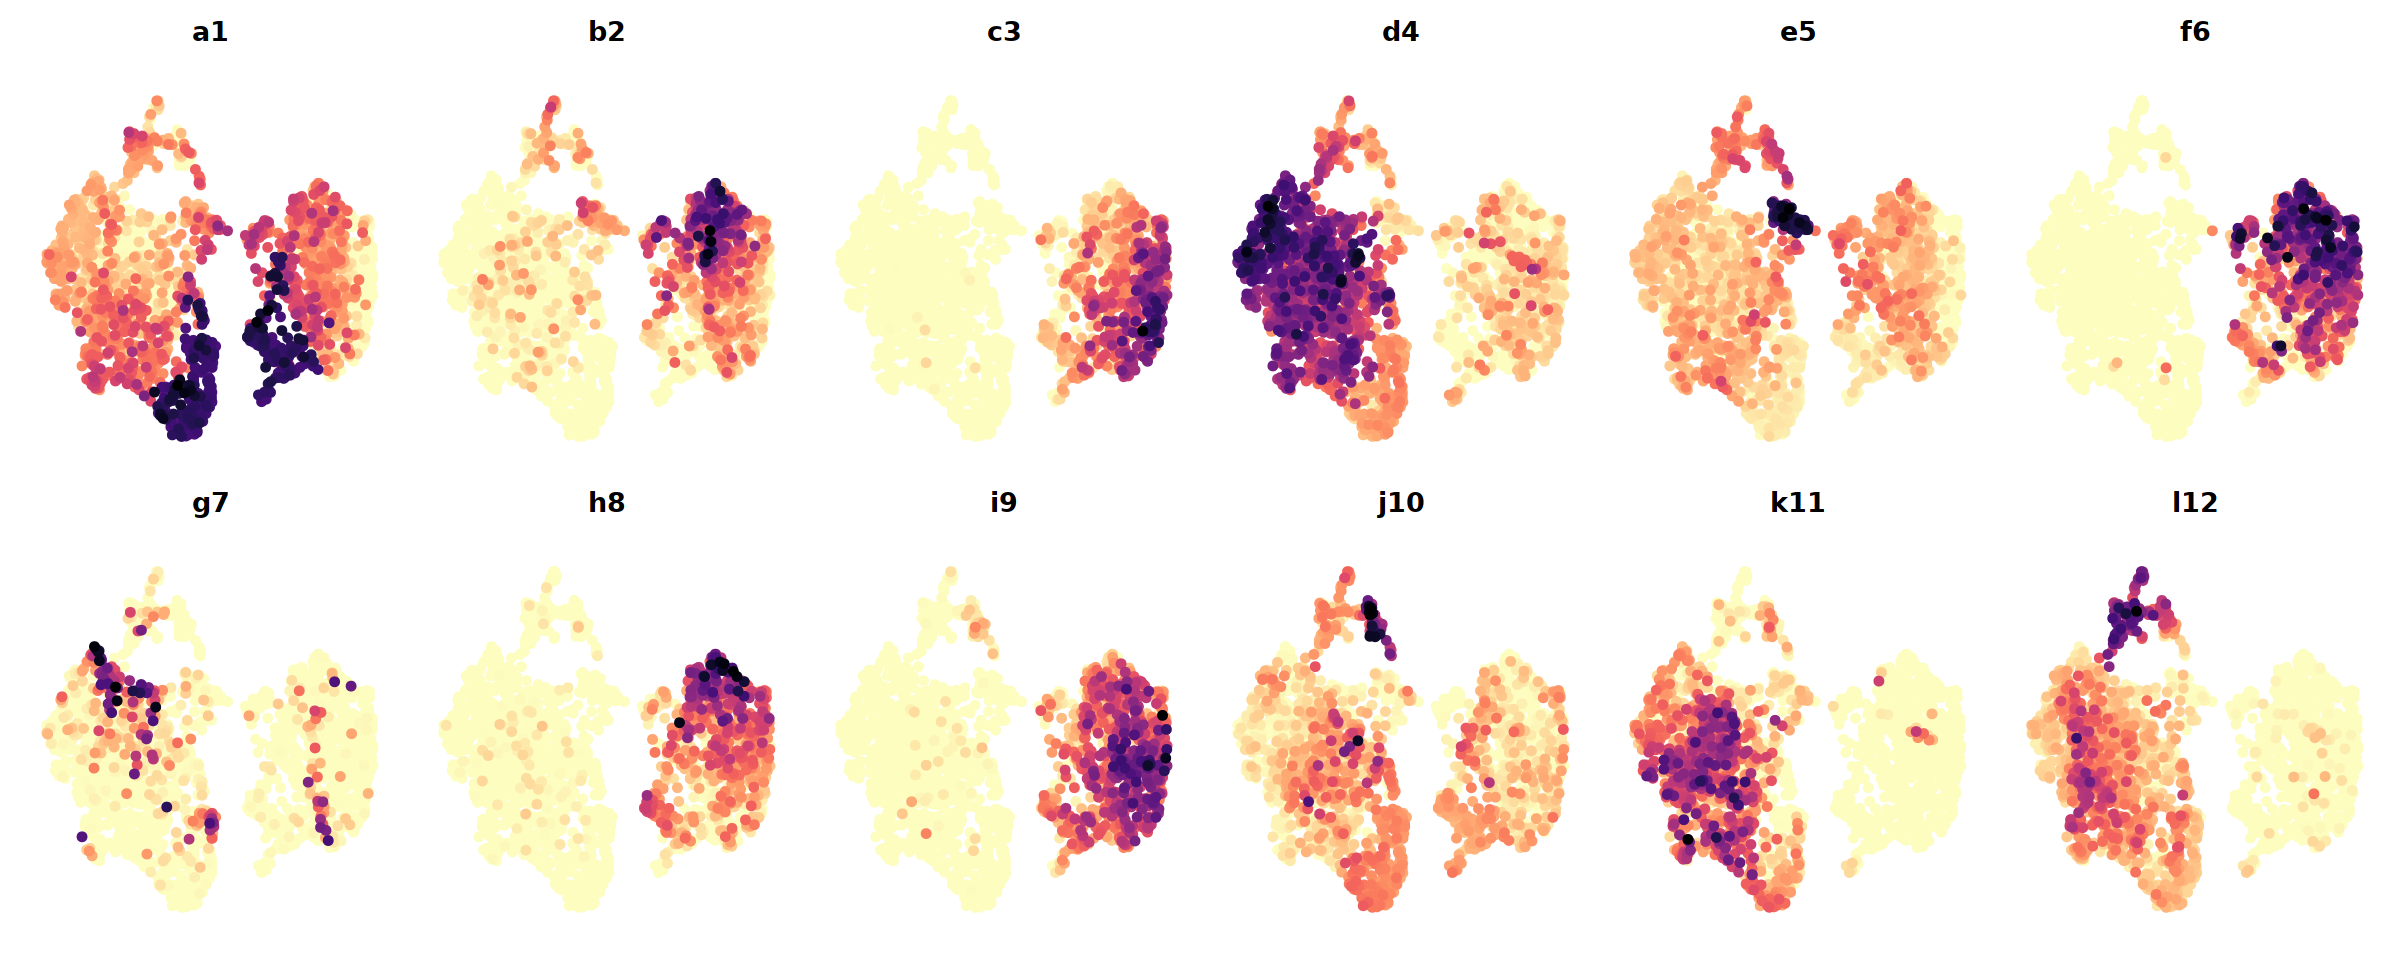

In [ ]:
options(repr.plot.height = 08, repr.plot.width = 20)
p <- FeaturePlot(reference, c('a1','b2','c3','d4','e5','f6','g7','h8','i9','j10','k11','l12'), 
                 reduction = 'umap2', order = TRUE,
                 min.cutoff = 0, pt.size = 2, ncol = 6,
                raster = TRUE) & 
  viridis::scale_colour_viridis(option = 'inferno', direction = -1) 
p & NoAxes() & NoLegend()

# In the manuscript, the number of the modules where arranged in order from top to bottom
# The matching modules dispalyed in Figure 2 and Supp Fig 2 are as follows:
# a1 = Module 1 - Immune activation
# b2 = Module INF
# c3 = Module 4 - Angiogenic sprouting
# d4 = Module 7 - SMC
# e5 = Module 2 - VLMC
# f6 = Module 3 - Capillary EC
# g7 = Module 6 - Cell cycle
# h8 = Module immune associated (related with capilar extravasation)
# i9 = Module 5 - Arterial EC
# j10 = Module 10 - Privascular fibroblast
# k11 = Module 8 - Pericyte
# l12 = Module 9 - ECM remodeling/angiogenesis

In [ ]:
ggsave('../figures/vascular_module_scores_inferno.pdf', height = 7, width = 20)

For cell annotation, we considered the results from the gene module detection perfomed using Hotspot <br>
and the expression of cell type-specific marker genes identified using the Wilcoxon rank-sum test <br>
by comparing all cells within a specific cluster to all cells outside said cluster. 

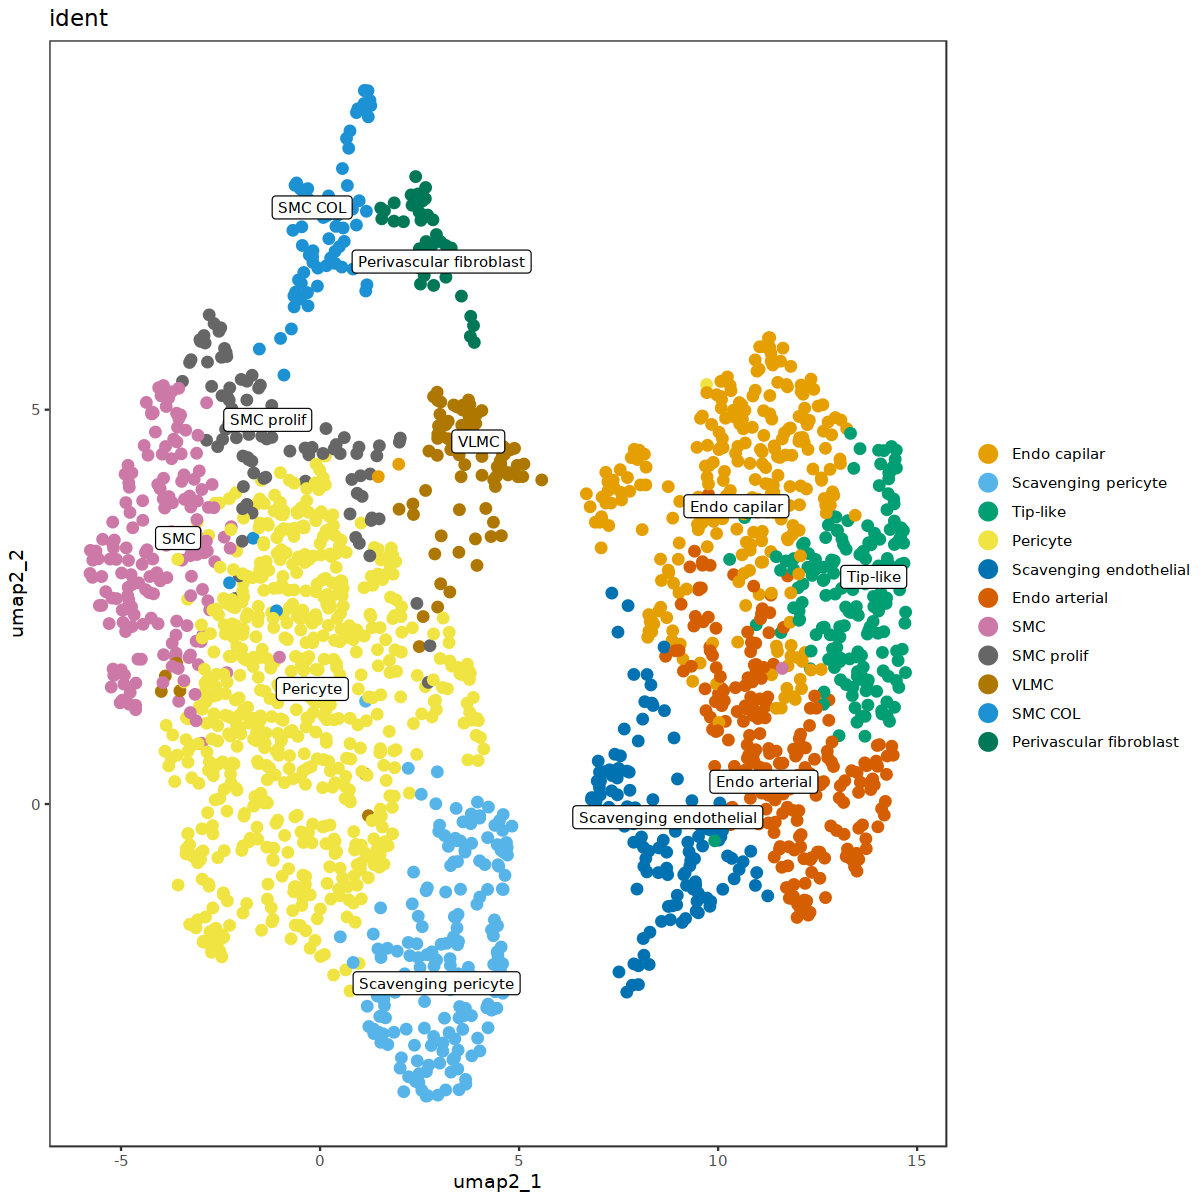

In [ ]:
Idents(reference) <- reference@meta.data$`leiden`

reference <- RenameIdents(reference, `0` = "Endo capilar",
                    `1` = "Scavenging pericyte",
                    `2` = "Tip-like", 
                    `3` = "Pericyte", 
                    `4` = "Pericyte", 
                    `5` = "Pericyte", 
                    `6` = "Scavenging endothelial", 
                    `7` = "Endo arterial", 
                    `8` = "Endo arterial", 
                    `9` = "SMC",
                    `10` = "SMC prolif",
                    `11` = "VLMC", 
                    `12` = "Pericyte", 
                    `13` = "SMC", 
                    `14` = "SMC COL",
                    `15` = "Pericyte",
                    `16` = "Pericyte", 
                    `17` = "Endo capilar", 
                    `18` = "Perivascular fibroblast", 
                    `19` = "Endo capilar"
                        )

options(repr.plot.height = 10, repr.plot.width = 10)
dittoDimPlot(reference, 
             reduction.use = "umap2", var = "ident", 
             do.label = TRUE, labels.size = 3, size = 3)

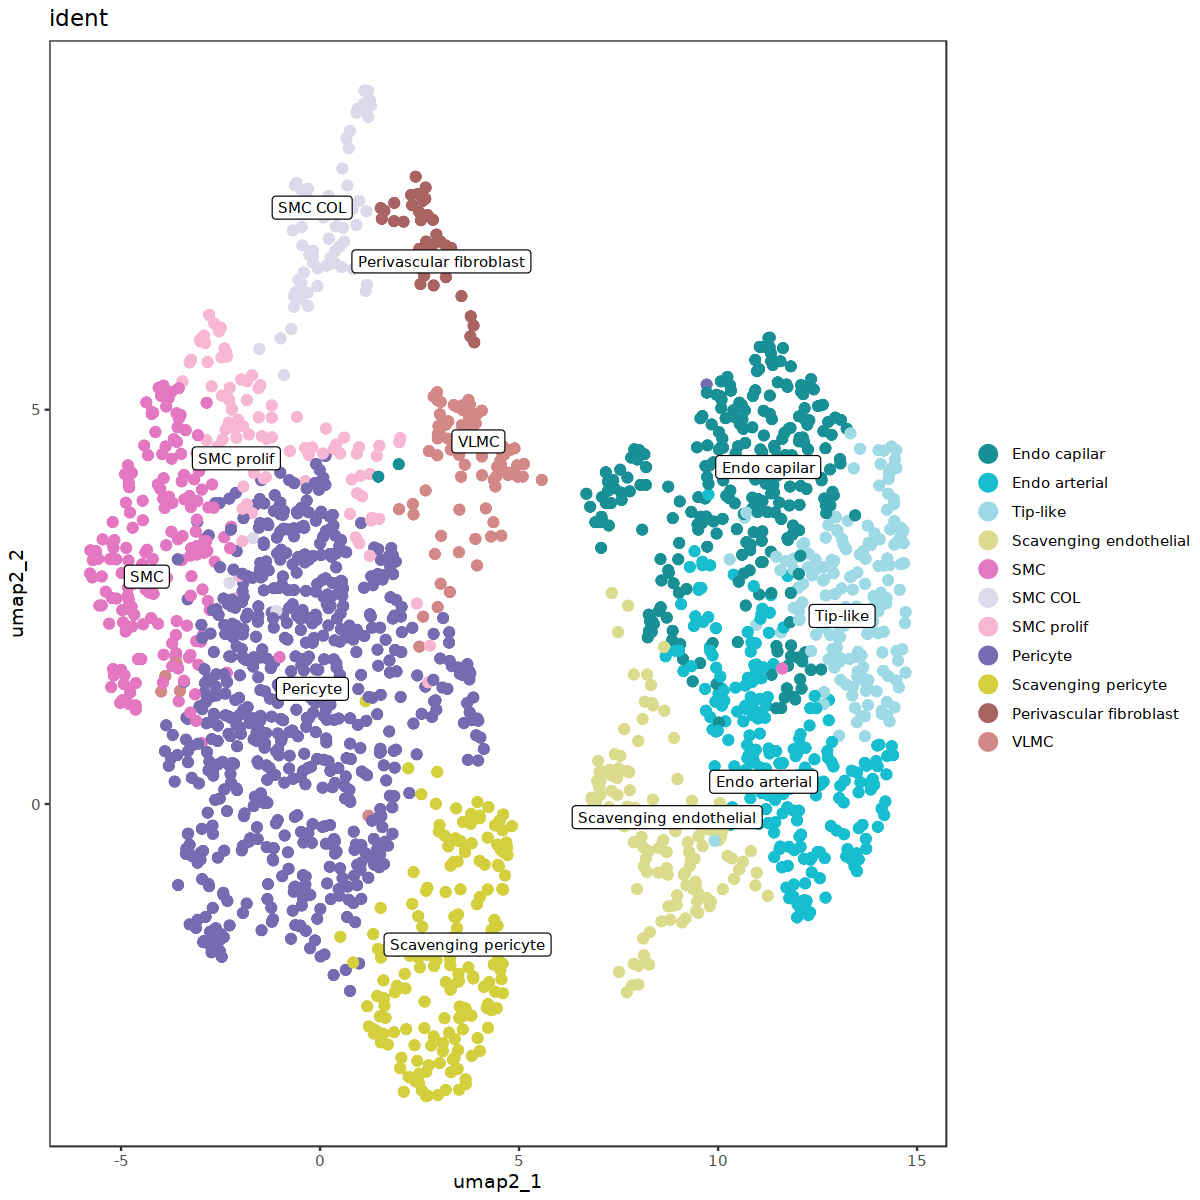

In [ ]:
reference@active.ident <- factor(x = reference@active.ident, 
                                 levels = c('Endo capilar', 'Endo arterial', 'Tip-like', 'Scavenging endothelial', # endo
                                            'SMC', 'SMC COL', 'SMC prolif', 
                                            'Pericyte', 'Scavenging pericyte',
                                            'Perivascular fibroblast', 'VLMC'
                                             ))

options(repr.plot.height = 10, repr.plot.width = 10)
dittoDimPlot(reference, 
             color.panel = c('#189096','#17becf', '#9edae5', '#dbdb8d', #endo
                            '#e377c2', '#dadaeb', '#f7b6d2', # SMC
                             '#756bb1', '#d3cf3d',  #peri
                             '#aa6363', '#d38888' #fibro
                            ),
             reduction.use = "umap2", var = "ident", 
             do.raster = TRUE,
             do.label = TRUE, labels.size = 3, size = 3)

In [ ]:
ggsave('../figures/subclustering_vascular.pdf', width = 9)

Saving 9 x 6.67 in image



In [ ]:
saveRDS(Idents(reference), 'data/vascular_detailed_cellstates.rds')